<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)


In [3]:
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 or older': 65
}

# Apply mapping
df['AgeNum'] = df['Age'].map(age_map)


### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




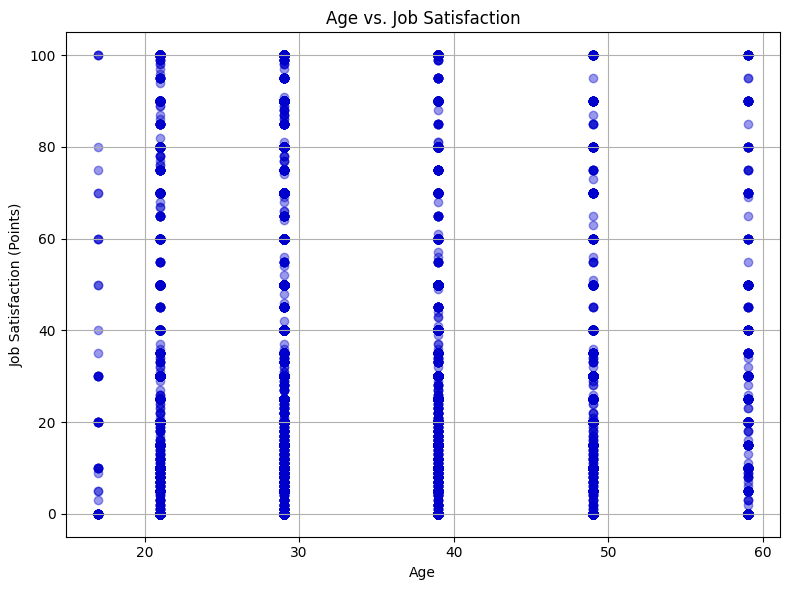

In [4]:
## Write your code here
plt.figure(figsize=(8, 6))
plt.scatter(df['AgeNum'], df['JobSatPoints_6'], alpha=0.4, color='mediumblue')
plt.title('Age vs. Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


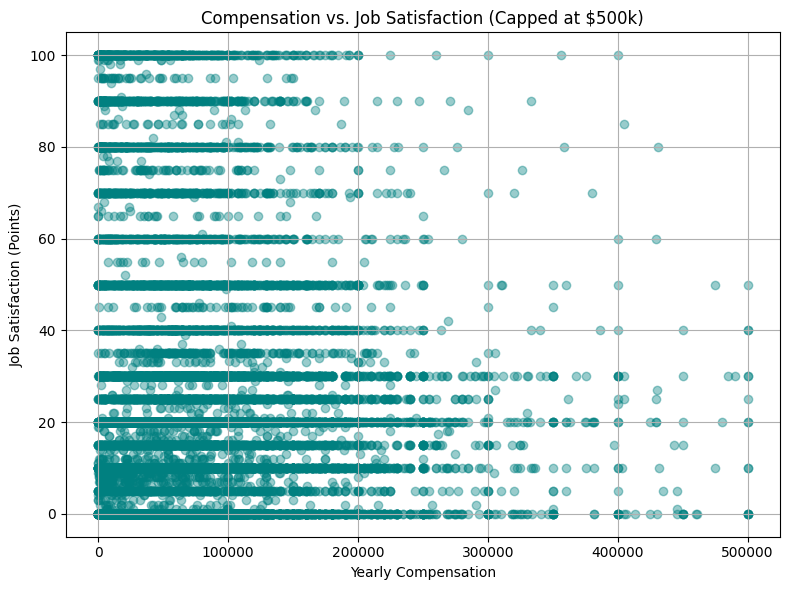

In [5]:
## Write your code here

# Filter out extremely high compensation values
df_filtered = df[(df['ConvertedCompYearly'] > 0) & (df['ConvertedCompYearly'] <= 500000)]

plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['ConvertedCompYearly'], df_filtered['JobSatPoints_6'], alpha=0.4, color='teal')
plt.title('Compensation vs. Job Satisfaction (Capped at $500k)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


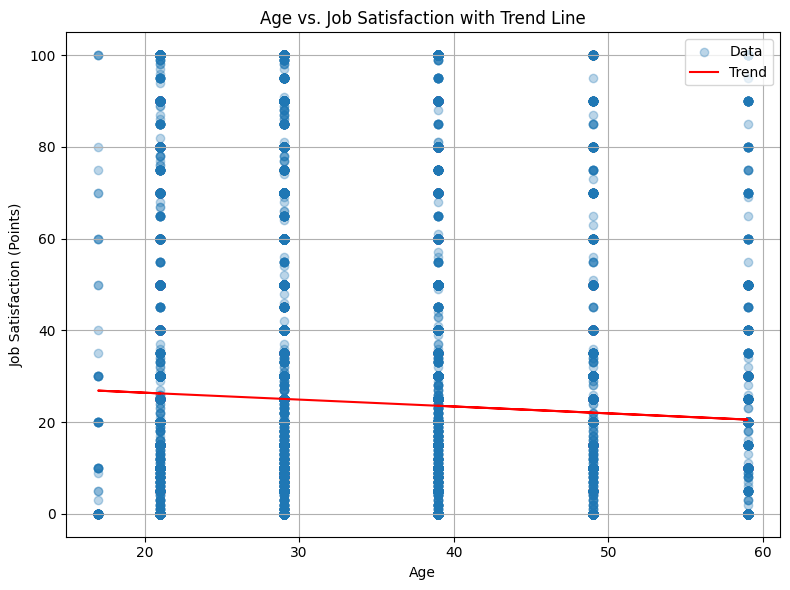

In [6]:
## Write your code here
import numpy as np

# Drop NA for clean regression
df_clean = df[['AgeNum', 'JobSatPoints_6']].dropna()

# Scatter
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['AgeNum'], df_clean['JobSatPoints_6'], alpha=0.3, label='Data')

# Regression line
z = np.polyfit(df_clean['AgeNum'], df_clean['JobSatPoints_6'], 1)
p = np.poly1d(z)
plt.plot(df_clean['AgeNum'], p(df_clean['AgeNum']), color='red', label='Trend')

plt.title('Age vs. Job Satisfaction with Trend Line')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (Points)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


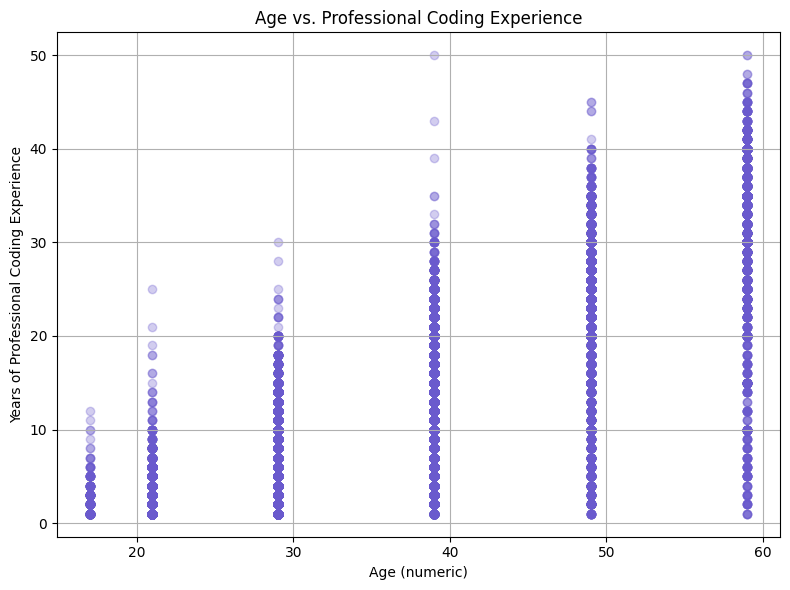

In [7]:
## Write your code here
# Ensure YearsCodePro is numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop missing values
df_scatter = df[['AgeNum', 'YearsCodePro']].dropna()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_scatter['AgeNum'], df_scatter['YearsCodePro'], alpha=0.3, color='slateblue')
plt.title('Age vs. Professional Coding Experience')
plt.xlabel('Age (numeric)')
plt.ylabel('Years of Professional Coding Experience')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


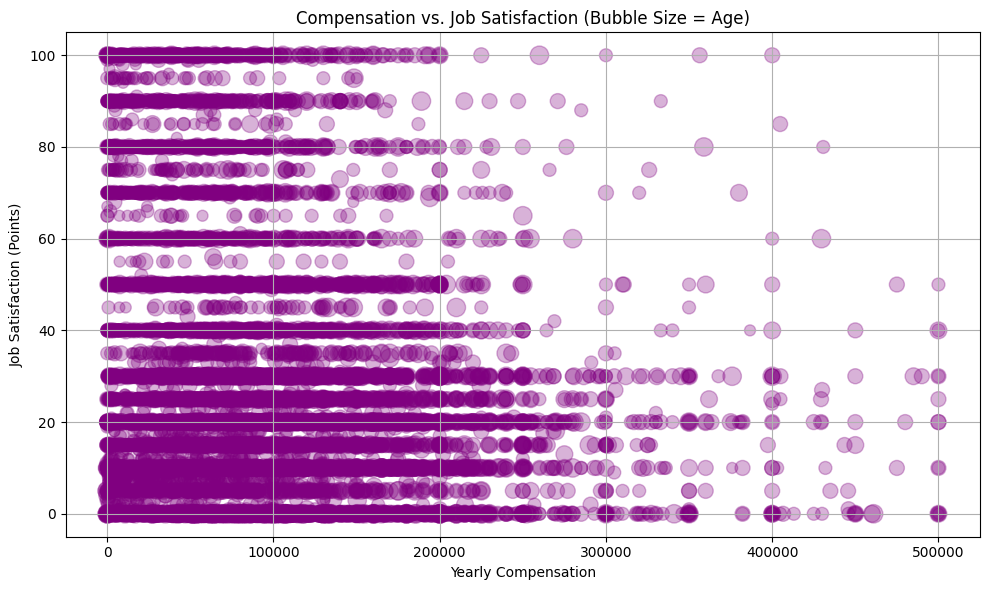

In [8]:
## Write your code here
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['ConvertedCompYearly'], df_filtered['JobSatPoints_6'],
            s=df_filtered['AgeNum']*3, alpha=0.3, color='purple')
plt.title('Compensation vs. Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


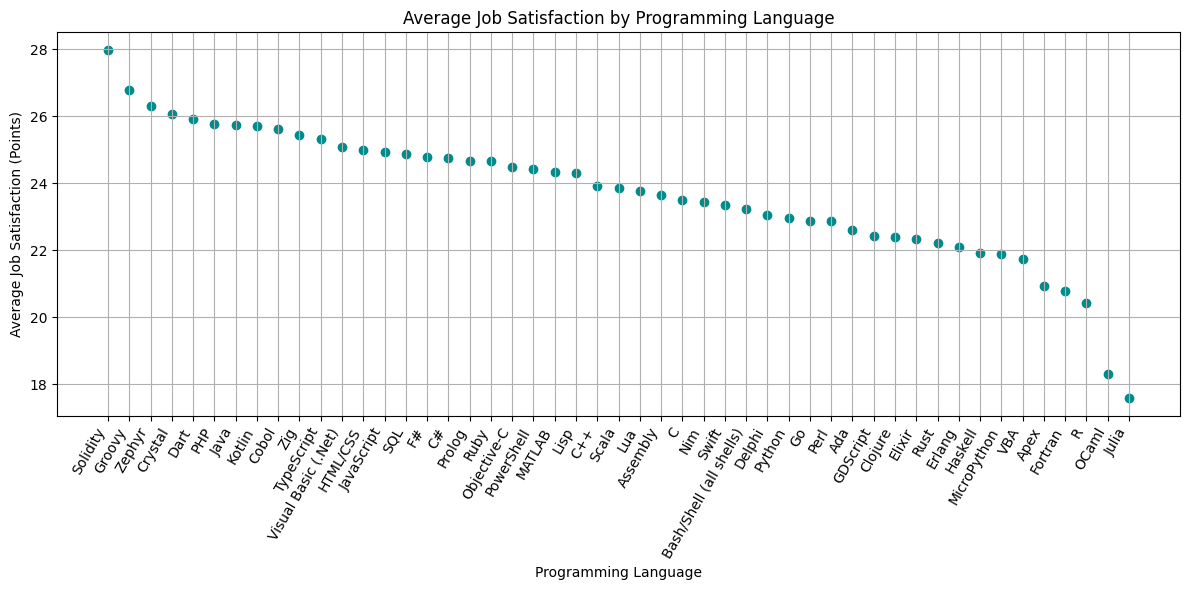

In [9]:
## Write your code here
# Prepare long-form data
lang_df = df[['LanguageHaveWorkedWith', 'JobSatPoints_6']].dropna()
lang_df = lang_df.assign(Language=lang_df['LanguageHaveWorkedWith'].str.split(';'))
lang_df = lang_df.explode('Language')

# Aggregate
lang_avg = lang_df.groupby('Language')['JobSatPoints_6'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(lang_avg.index, lang_avg.values, color='darkcyan')
plt.xticks(rotation=60, ha='right')
plt.title('Average Job Satisfaction by Programming Language')
plt.xlabel('Programming Language')
plt.ylabel('Average Job Satisfaction (Points)')
plt.tight_layout()
plt.grid(True)
plt.show()


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


/tmp/ipykernel_1647/560045915.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Employment'] = df_filtered['Employment'].str.split(';')


ValueError: cannot reindex on an axis with duplicate labels

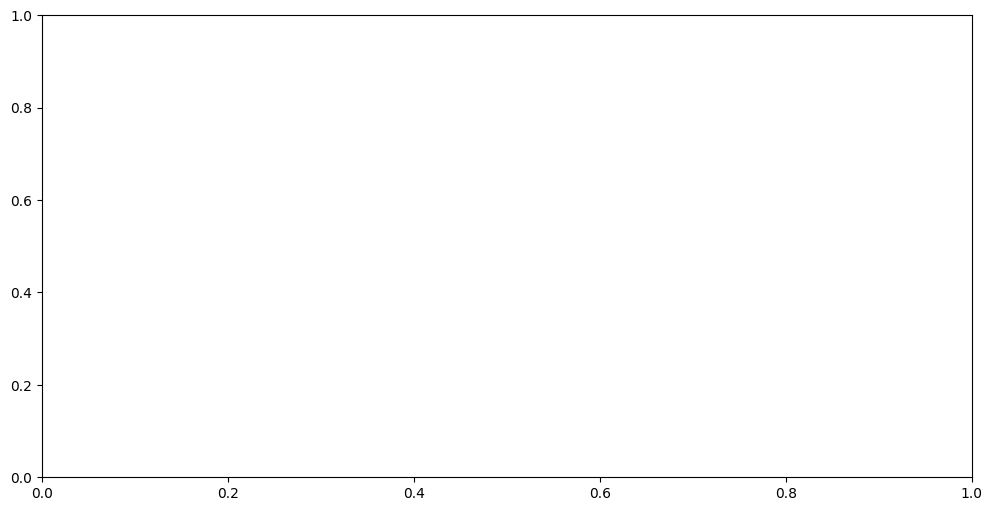

In [10]:
## Write your code here
import seaborn as sns

# Filter by reasonable compensation range
df_filtered = df[df['ConvertedCompYearly'].between(0, 500000)]

# Split Employment by semicolons
df_filtered['Employment'] = df_filtered['Employment'].str.split(';')

# Explode to one row per employment type
df_filtered = df_filtered.explode('Employment')

# Strip any leading/trailing whitespace
df_filtered['Employment'] = df_filtered['Employment'].str.strip()

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_filtered,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    hue='Employment',
    alpha=0.5
)

plt.title('Compensation vs. Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (Points)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


In [ ]:
## Write your code here
# Clean & prepare data
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 or older'
]
df = df[df['Age'].isin(age_order)]
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Limit to top 5 countries
top_countries = df['Country'].value_counts().nlargest(5).index
df_filtered = df[df['Country'].isin(top_countries)].dropna(subset=['YearsCodePro', 'Age'])

# Plot
plt.figure(figsize=(12, 6))
sns.stripplot(data=df_filtered,
              x='Age', y='YearsCodePro', hue='Country',
              jitter=True, alpha=0.5, dodge=True)

plt.title('Work Experience by Age Group and Country')
plt.xlabel('Age Group')
plt.ylabel('Years of Professional Coding Experience')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
